Note: This altered version uses Mean for replacing NaN values, as well as replaces the RFE features from 10 to 6

# Data Cleaning and Preprocessing for Donor Information

This notebook focuses on cleaning and preprocessing donor data from the `combined_donor_info.csv` file. The objective is to handle missing values, reduce features that are mostly missing, and prepare the data for further analysis and machine learning tasks.

In [173]:
# Importing libraries 
# We will primarily use `pandas` for data manipulation and cleaning.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [174]:
# Load the dataset
df = pd.read_csv('combined_donor_info.csv')

# Display the first few rows
df.head()

,Masked Account ID,Maked Primary Campaign,Stage,Account Type,Billing Zip/Postal Code,Fiscal Period,Close Date,Amount,ZCTA,Year,...,Public Transport,Worked from Home,Health Ins Pop,Health Ins,No Health Ins,Labor Population,Armed Forces,Employed,Unemployed,Not in Labor Force
0,1,NaN,Closed Won,Household,90069,Q3-2022,7/5/2022,200000.0,90069.0,2021.0,...,333.0,3432.0,20185.0,19509.0,676.0,19125.0,0.0,14080.0,1124.0,3921.0
1,1,NaN,Closed Won,Household,90069,Q3-2022,7/5/2022,200000.0,90069.0,2020.0,...,241.0,2589.0,20035.0,19339.0,696.0,19017.0,0.0,14119.0,910.0,3988.0
2,1,NaN,Closed Won,Household,90069,Q3-2022,7/5/2022,200000.0,90069.0,2019.0,...,266.0,1963.0,20230.0,19348.0,882.0,19254.0,0.0,14444.0,738.0,4072.0
3,1,NaN,Closed Won,Household,90069,Q3-2023,7/14/2023,200000.0,90069.0,2021.0,...,333.0,3432.0,20185.0,19509.0,676.0,19125.0,0.0,14080.0,1124.0,3921.0
4,1,NaN,Closed Won,Household,90069,Q3-2023,7/14/2023,200000.0,90069.0,2020.0,...,241.0,2589.0,20035.0,19339.0,696.0,19017.0,0.0,14119.0,910.0,3988.0


## Checking Data Types and Missing Values

We use `.info()` to examine the data types and number of non-null values for each feature, and `.describe()` for a statistical summary of numerical features. Additionally, we calculate the percentage of missing values in each column.

In [175]:
# Check the data types and non-null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 87 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Masked Account ID                  6290 non-null   int64  
 1   Maked Primary Campaign             4504 non-null   object 
 2   Stage                              6290 non-null   object 
 3   Account Type                       6290 non-null   object 
 4   Billing Zip/Postal Code            5789 non-null   object 
 5   Fiscal Period                      6290 non-null   object 
 6   Close Date                         6290 non-null   object 
 7   Amount                             6290 non-null   float64
 8   ZCTA                               5662 non-null   float64
 9   Year                               4780 non-null   float64
 10  Pop                                4780 non-null   float64
 11  Households                         4780 non-null   float

In [176]:
# Statistical summary of numerical columns
df.describe()

,Masked Account ID,Amount,ZCTA,Year,Pop,Households,HH Income,Education Years,Minority,Under 10,...,Public Transport,Worked from Home,Health Ins Pop,Health Ins,No Health Ins,Labor Population,Armed Forces,Employed,Unemployed,Not in Labor Force
count,6290.000000,6.290000e+03,5662.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,...,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000
mean,472.245628,4.872656e+03,86845.853762,2020.005858,28881.300418,12046.998326,111.919718,15.002583,9451.154603,2873.945816,...,783.567992,2134.437657,28770.460042,27127.008159,1643.451883,24276.261925,19.048954,15465.512134,900.946653,7890.754184
std,386.745184,1.102559e+05,14516.508915,0.817756,16938.925375,6997.016492,24.481824,1.851160,9997.166591,1880.665073,...,1799.634002,1447.170498,16841.919092,15401.362681,2108.157507,14425.163945,50.577627,9690.622819,717.243955,4827.012112
min,1.000000,-2.000000e+02,10002.000000,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,133.000000,1.000000e+02,90046.000000,2019.000000,15292.000000,5887.000000,99.483534,14.783736,2555.000000,1524.000000,...,76.000000,1017.000000,15214.000000,14755.000000,529.000000,12641.250000,0.000000,7576.000000,356.000000,3924.000000
50%,359.000000,2.500000e+02,90074.000000,2020.000000,25988.000000,11775.000000,111.718232,15.497020,6354.500000,2932.000000,...,374.000000,1837.000000,25901.000000,25015.000000,807.500000,21542.000000,0.000000,14259.000000,762.000000,7203.000000
75%,777.750000,1.000000e+03,91031.000000,2021.000000,39755.000000,16375.000000,128.312519,15.917162,12812.000000,3747.000000,...,626.250000,3045.000000,39568.000000,35987.000000,2039.750000,32305.000000,21.000000,20221.000000,1234.000000,10126.000000
max,1321.000000,5.000029e+06,98607.000000,2021.000000,100225.000000,38263.000000,162.891641,16.751562,78022.000000,16452.000000,...,26134.000000,10835.000000,100146.000000,92505.000000,15502.000000,75511.000000,799.000000,55321.000000,4404.000000,34013.000000


In [177]:
# Percentage of missing values in each column
missing_values = df.isnull().mean() * 100
missing_values

Masked Account ID           0.000000
Maked Primary Campaign     28.394277
Stage                       0.000000
Account Type                0.000000
Billing Zip/Postal Code     7.965024
                             ...    
Labor Population           24.006359
Armed Forces               24.006359
Employed                   24.006359
Unemployed                 24.006359
Not in Labor Force         24.006359
Length: 87, dtype: float64

In [178]:
## Identify Features with Too Many Missing Values
# Identify features with more than 80% missing values, which can potentially be removed since they do not provide much useful information.
features_to_consider_removing = missing_values[missing_values > 80].index.tolist()
features_to_consider_removing

[]

## Handling Missing Data

For categorical features, we fill missing values with the mode (most frequent value). For numerical features, we use the mean to replace missing values to avoid the impact of outliers.

In [179]:
# Create a copy of the original DataFrame for cleaning
df_copy = df.copy()

# Fill missing values appropriately
for column in df_copy.columns:
    if df_copy[column].dtype == 'object':  # Categorical data
        # Fill missing values with mode for categorical data
        df_copy[column] = df_copy[column].fillna(df_copy[column].mode()[0])
    else:  # Numerical data
        # Fill missing values with mean for numerical data
        df_copy[column] = df_copy[column].fillna(df_copy[column].mean())

In [180]:
# Verify if all missing values are handled
missing_values = df_copy.isnull().mean() * 100
missing_values

Masked Account ID          0.0
Maked Primary Campaign     0.0
Stage                      0.0
Account Type               0.0
Billing Zip/Postal Code    0.0
                          ... 
Labor Population           0.0
Armed Forces               0.0
Employed                   0.0
Unemployed                 0.0
Not in Labor Force         0.0
Length: 87, dtype: float64

In [181]:
# Additional Notes from Maker Day 10.5.24
# count how many missing values in each column compared to total in different row
# user - row
# column - feature
# if 80% of users didn't have feature info, can reduce


# if too many missing values - may remove feature altogether

# kmeans clustering, see if features are similar & try to make predictions
# missing values - mean, mode, median - depends on how data looks like

# look @ each column, try to preprocess it :) :(((
# find numbers and see what want to remove

# pca - reduces number of features (dimensionaliy reduction)

## Outliers

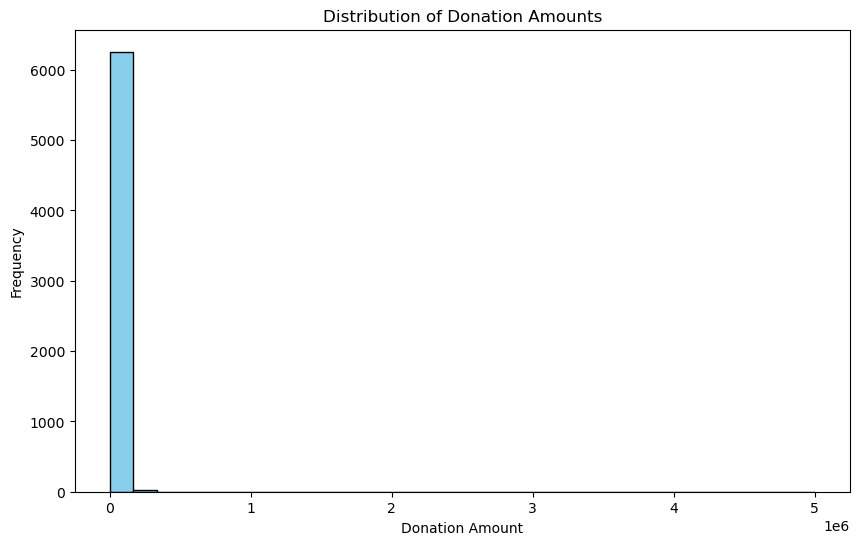

In [182]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_copy['Amount'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Donation Amounts')
plt.xlabel('Donation Amount')
plt.ylabel('Frequency')
plt.show()

/Users/imani/anaconda3/envs/UW/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


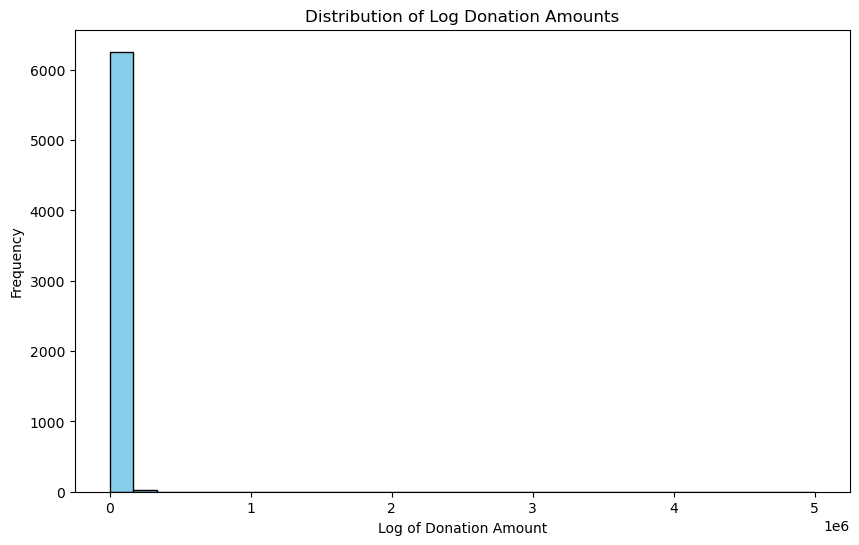

In [183]:
df['Amount'] = np.log1p(df['Amount'])
plt.figure(figsize=(10, 6))
plt.hist(df_copy['Amount'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Log Donation Amounts')
plt.xlabel('Log of Donation Amount')
plt.ylabel('Frequency')
plt.show()

In [184]:
# Step 1: Set the threshold at the 95th percentile of the 'Amount' column
threshold = df_copy['Amount'].quantile(0.95)

# Step 2: Create the 'large_donation_flag' column
df_copy['large_donation_flag'] = (df_copy['Amount'] > threshold).astype(int)

# Step 3: Count the number of large donations
large_donations_count = df_copy[df_copy['large_donation_flag'] == 1].shape[0]  # This will give the count of rows

# Print the result
print(f"Number of large donations (above the 95th percentile): {large_donations_count}")

Number of large donations (above the 95th percentile): 257


In [185]:
df_copy.columns

Index(['Masked Account ID', 'Maked Primary Campaign', 'Stage', 'Account Type',
       'Billing Zip/Postal Code', 'Fiscal Period', 'Close Date', 'Amount',
       'ZCTA', 'Year', 'Pop', 'Households', 'HH Income', 'Education Years',
       'Minority %', 'Poor %', 'Poor Family %', 'Car or Van %',
       'Public Transport %', 'Health Ins %', 'No Health Ins %', 'Unemployed %',
       'Employed %', 'Armed Forces %', 'Not in Labor Force %', 'Under 10 %',
       'Under 35 %', 'Over 65 %', 'Over 85 %', 'High school %', 'College %',
       '0-50k %', '50-100k %', '100-150k %', '150-200k %', '200k+ %',
       'Minority', 'Under 10', 'Under 35', 'Over 65', 'Over 85', 'Male 10-14',
       'Male 15-17', 'Male 18-19', 'Male 20', 'Male 21', 'Male 22-24',
       'Male 25-29', 'Male 30-34', 'Female 10-14', 'Female 15-17',
       'Female 18-19', 'Female 20', 'Female 21', 'Female 22-24',
       'Female 25-29', 'Female 30-34', 'Ed Pop', 'Less than High School',
       'High school', 'GED', 'Some college to 

In [186]:
df_copy['Female 15-17']

0        64.000000
1        96.000000
2       100.000000
3        64.000000
4        96.000000
           ...    
6285    411.739331
6286    411.739331
6287    910.000000
6288    935.000000
6289    920.000000
Name: Female 15-17, Length: 6290, dtype: float64

In [187]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns to scale
numerical_columns = ['Amount', 'Pop', 'Households', 'HH Income', 'Education Years']

# Initialize the scaler and fit-transform the numerical columns
scaler = StandardScaler()
df_copy[numerical_columns] = scaler.fit_transform(df_copy[numerical_columns])

In [188]:
df_copy[numerical_columns]

,Amount,Pop,Households,HH Income,Education Years
0,1.769909,-0.588987,0.130678,-2.015035e-01,3.815771e-01
1,1.769909,-0.599146,0.085753,-3.631678e-01,3.652358e-01
2,1.769909,-0.585939,0.072308,-3.450642e-01,3.193584e-01
3,1.769909,-0.588987,0.130678,-2.015035e-01,3.815771e-01
4,1.769909,-0.599146,0.085753,-3.631678e-01,3.652358e-01
...,...,...,...,...,...
6285,-0.032859,0.000000,0.000000,6.659371e-16,-1.100888e-15
6286,-0.032859,0.000000,0.000000,6.659371e-16,-1.100888e-15
6287,-0.039662,0.721287,0.513530,6.194018e-01,4.467634e-02
6288,-0.039662,0.577432,0.381213,3.807789e-01,4.593710e-04


In [189]:
#df_copy = pd.get_dummies(df, columns=['Account Type', 'Stage', 'Masked Primary Campaign'], drop_first=True)
df.columns

Index(['Masked Account ID', 'Maked Primary Campaign', 'Stage', 'Account Type',
       'Billing Zip/Postal Code', 'Fiscal Period', 'Close Date', 'Amount',
       'ZCTA', 'Year', 'Pop', 'Households', 'HH Income', 'Education Years',
       'Minority %', 'Poor %', 'Poor Family %', 'Car or Van %',
       'Public Transport %', 'Health Ins %', 'No Health Ins %', 'Unemployed %',
       'Employed %', 'Armed Forces %', 'Not in Labor Force %', 'Under 10 %',
       'Under 35 %', 'Over 65 %', 'Over 85 %', 'High school %', 'College %',
       '0-50k %', '50-100k %', '100-150k %', '150-200k %', '200k+ %',
       'Minority', 'Under 10', 'Under 35', 'Over 65', 'Over 85', 'Male 10-14',
       'Male 15-17', 'Male 18-19', 'Male 20', 'Male 21', 'Male 22-24',
       'Male 25-29', 'Male 30-34', 'Female 10-14', 'Female 15-17',
       'Female 18-19', 'Female 20', 'Female 21', 'Female 22-24',
       'Female 25-29', 'Female 30-34', 'Ed Pop', 'Less than High School',
       'High school', 'GED', 'Some college to 

In [190]:
conv_to_float = []
for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
        conv_to_float.append(col)

conv_to_float


['Maked Primary Campaign',
 'Stage',
 'Account Type',
 'Billing Zip/Postal Code',
 'Fiscal Period',
 'Close Date',
 'Minority %',
 'Poor %',
 'Poor Family %',
 'Car or Van %',
 'Public Transport %',
 'Health Ins %',
 'No Health Ins %',
 'Unemployed %',
 'Employed %',
 'Armed Forces %',
 'Not in Labor Force %',
 'Under 10 %',
 'Under 35 %',
 'Over 65 %',
 'Over 85 %',
 'High school %',
 'College %',
 '0-50k %',
 '50-100k %',
 '100-150k %',
 '150-200k %',
 '200k+ %']

In [191]:
exclude_cols = ['Maked Primary Campaign', 'Stage', 'Account Type', 'Billing Zip/Postal Code', 'Fiscal Period', 'Close Date']
conv_to_float = [col for col in conv_to_float if col not in exclude_cols]

for col in conv_to_float:
    # Replace '#DIV/0!' with NaN first
    df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')
    
    # Fill NaNs (formerly #DIV/0!) with the mean of the column
    mean_value = df_copy[col].mean()
    df_copy[col] = df_copy[col].fillna(mean_value)
    
    # Convert the column to float
    try:
        df_copy[col] = df_copy[col].astype(float)
        print(f"Column '{col}' successfully converted to float with mean replacement.")
    except ValueError:
        print(f"Column '{col}' could not be converted to float.")

Column 'Minority %' successfully converted to float with mean replacement.
Column 'Poor %' successfully converted to float with mean replacement.
Column 'Poor Family %' successfully converted to float with mean replacement.
Column 'Car or Van %' successfully converted to float with mean replacement.
Column 'Public Transport %' successfully converted to float with mean replacement.
Column 'Health Ins %' successfully converted to float with mean replacement.
Column 'No Health Ins %' successfully converted to float with mean replacement.
Column 'Unemployed %' successfully converted to float with mean replacement.
Column 'Employed %' successfully converted to float with mean replacement.
Column 'Armed Forces %' successfully converted to float with mean replacement.
Column 'Not in Labor Force %' successfully converted to float with mean replacement.
Column 'Under 10 %' successfully converted to float with mean replacement.
Column 'Under 35 %' successfully converted to float with mean replac

In [192]:
df_copy

,Masked Account ID,Maked Primary Campaign,Stage,Account Type,Billing Zip/Postal Code,Fiscal Period,Close Date,Amount,ZCTA,Year,...,Worked from Home,Health Ins Pop,Health Ins,No Health Ins,Labor Population,Armed Forces,Employed,Unemployed,Not in Labor Force,large_donation_flag
0,1,Campaign One 2015,Closed Won,Household,90069,Q3-2022,7/5/2022,1.769909,90069.0,2021.000000,...,3432.000000,20185.000000,19509.000000,676.000000,19125.000000,0.000000,14080.000000,1124.000000,3921.000000,1
1,1,Campaign One 2015,Closed Won,Household,90069,Q3-2022,7/5/2022,1.769909,90069.0,2020.000000,...,2589.000000,20035.000000,19339.000000,696.000000,19017.000000,0.000000,14119.000000,910.000000,3988.000000,1
2,1,Campaign One 2015,Closed Won,Household,90069,Q3-2022,7/5/2022,1.769909,90069.0,2019.000000,...,1963.000000,20230.000000,19348.000000,882.000000,19254.000000,0.000000,14444.000000,738.000000,4072.000000,1
3,1,Campaign One 2015,Closed Won,Household,90069,Q3-2023,7/14/2023,1.769909,90069.0,2021.000000,...,3432.000000,20185.000000,19509.000000,676.000000,19125.000000,0.000000,14080.000000,1124.000000,3921.000000,1
4,1,Campaign One 2015,Closed Won,Household,90069,Q3-2023,7/14/2023,1.769909,90069.0,2020.000000,...,2589.000000,20035.000000,19339.000000,696.000000,19017.000000,0.000000,14119.000000,910.000000,3988.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6285,1288,Campaign Two 2023,Closed Won,Household,91105,Q3-2023,7/25/2023,-0.032859,91189.0,2020.005858,...,2134.437657,28770.460042,27127.008159,1643.451883,24276.261925,19.048954,15465.512134,900.946653,7890.754184,0
6286,1289,Campaign Two 2023,Closed Won,Household,90720,Q3-2023,7/29/2023,-0.032859,90721.0,2020.005858,...,2134.437657,28770.460042,27127.008159,1643.451883,24276.261925,19.048954,15465.512134,900.946653,7890.754184,0
6287,1321,Campaign Two 2023,Closed Won,Household,60068,Q3-2023,8/7/2023,-0.039662,60068.0,2021.000000,...,2921.000000,39109.000000,37940.000000,1169.000000,31194.000000,0.000000,19684.000000,700.000000,10810.000000,0
6288,1321,Campaign Two 2023,Closed Won,Household,60068,Q3-2023,8/7/2023,-0.039662,60068.0,2020.000000,...,1850.000000,36937.000000,35823.000000,1114.000000,29654.000000,9.000000,18398.000000,608.000000,10639.000000,0


In [193]:
percentage_columns = [ 'Minority %',
 'Poor %',
 'Poor Family %',
 'Car or Van %',
 'Public Transport %',
 'Health Ins %',
 'No Health Ins %',
 'Unemployed %',
 'Employed %',
 'Armed Forces %',
 'Not in Labor Force %',
 'Under 10 %',
 'Under 35 %',
 'Over 65 %',
 'Over 85 %',
 'High school %',
 'College %',
 '0-50k %',
 '50-100k %',
 '100-150k %',
 '150-200k %',
 '200k+ %']

In [194]:
correlations = df_copy[['Amount'] + percentage_columns].corr()
correlations

,Amount,Minority %,Poor %,Poor Family %,Car or Van %,Public Transport %,Health Ins %,No Health Ins %,Unemployed %,Employed %,...,Under 35 %,Over 65 %,Over 85 %,High school %,College %,0-50k %,50-100k %,100-150k %,150-200k %,200k+ %
Amount,1.000000,-0.012754,0.007311,-0.026157,0.000517,-0.008576,0.000907,-0.000342,0.035775,0.050068,...,-0.024193,-0.013827,-0.020503,-0.008351,0.005902,0.019044,0.019428,0.012353,-0.025477,-0.019284
Minority %,-0.012754,1.000000,0.600331,0.592879,-0.011326,0.460770,-0.583279,0.587700,0.468539,0.013928,...,0.415793,-0.319327,-0.139062,0.672679,-0.655834,0.622908,0.484884,-0.016709,-0.301837,-0.617517
Poor %,0.007311,0.600331,1.000000,0.689542,-0.222500,0.395616,-0.636942,0.637791,0.494172,-0.140449,...,0.494777,-0.317262,-0.174665,0.643901,-0.610577,0.853401,0.401556,-0.348761,-0.649871,-0.638878
Poor Family %,-0.026157,0.592879,0.689542,1.000000,0.072281,0.330539,-0.699422,0.699662,0.374919,-0.110752,...,0.321664,-0.318832,-0.260758,0.869431,-0.827101,0.681575,0.471984,-0.326647,-0.509515,-0.563571
Car or Van %,0.000517,-0.011326,-0.222500,0.072281,1.000000,-0.509156,-0.119168,0.126652,-0.113997,0.018004,...,-0.178861,-0.033947,-0.136835,0.187299,-0.266210,-0.077550,0.257437,0.246971,0.022131,-0.067257
Public Transport %,-0.008576,0.460770,0.395616,0.330539,-0.509156,1.000000,-0.405172,0.405782,0.199351,0.215881,...,0.339392,-0.292786,-0.184668,0.370553,-0.312179,0.391379,0.281290,-0.171536,-0.246096,-0.338606
Health Ins %,0.000907,-0.583279,-0.636942,-0.699422,-0.119168,-0.405172,1.000000,-0.999659,-0.346195,-0.091357,...,-0.284763,0.358635,0.308071,-0.846745,0.852291,-0.786837,-0.706031,0.093716,0.566248,0.789484
No Health Ins %,-0.000342,0.587700,0.637791,0.699662,0.126652,0.405782,-0.999659,1.000000,0.351744,0.086404,...,0.281541,-0.354797,-0.304601,0.848515,-0.855044,0.788912,0.709192,-0.089271,-0.563969,-0.790105
Unemployed %,0.035775,0.468539,0.494172,0.374919,-0.113997,0.199351,-0.346195,0.351744,1.000000,0.122106,...,0.312233,-0.309990,-0.116705,0.349044,-0.357868,0.473637,0.427030,-0.107867,-0.254689,-0.462444
Employed %,0.050068,0.013928,-0.140449,-0.110752,0.018004,0.215881,-0.091357,0.086404,0.122106,1.000000,...,0.474076,-0.733331,-0.589276,-0.063758,0.091724,-0.131907,0.388687,0.160039,0.060762,-0.148587


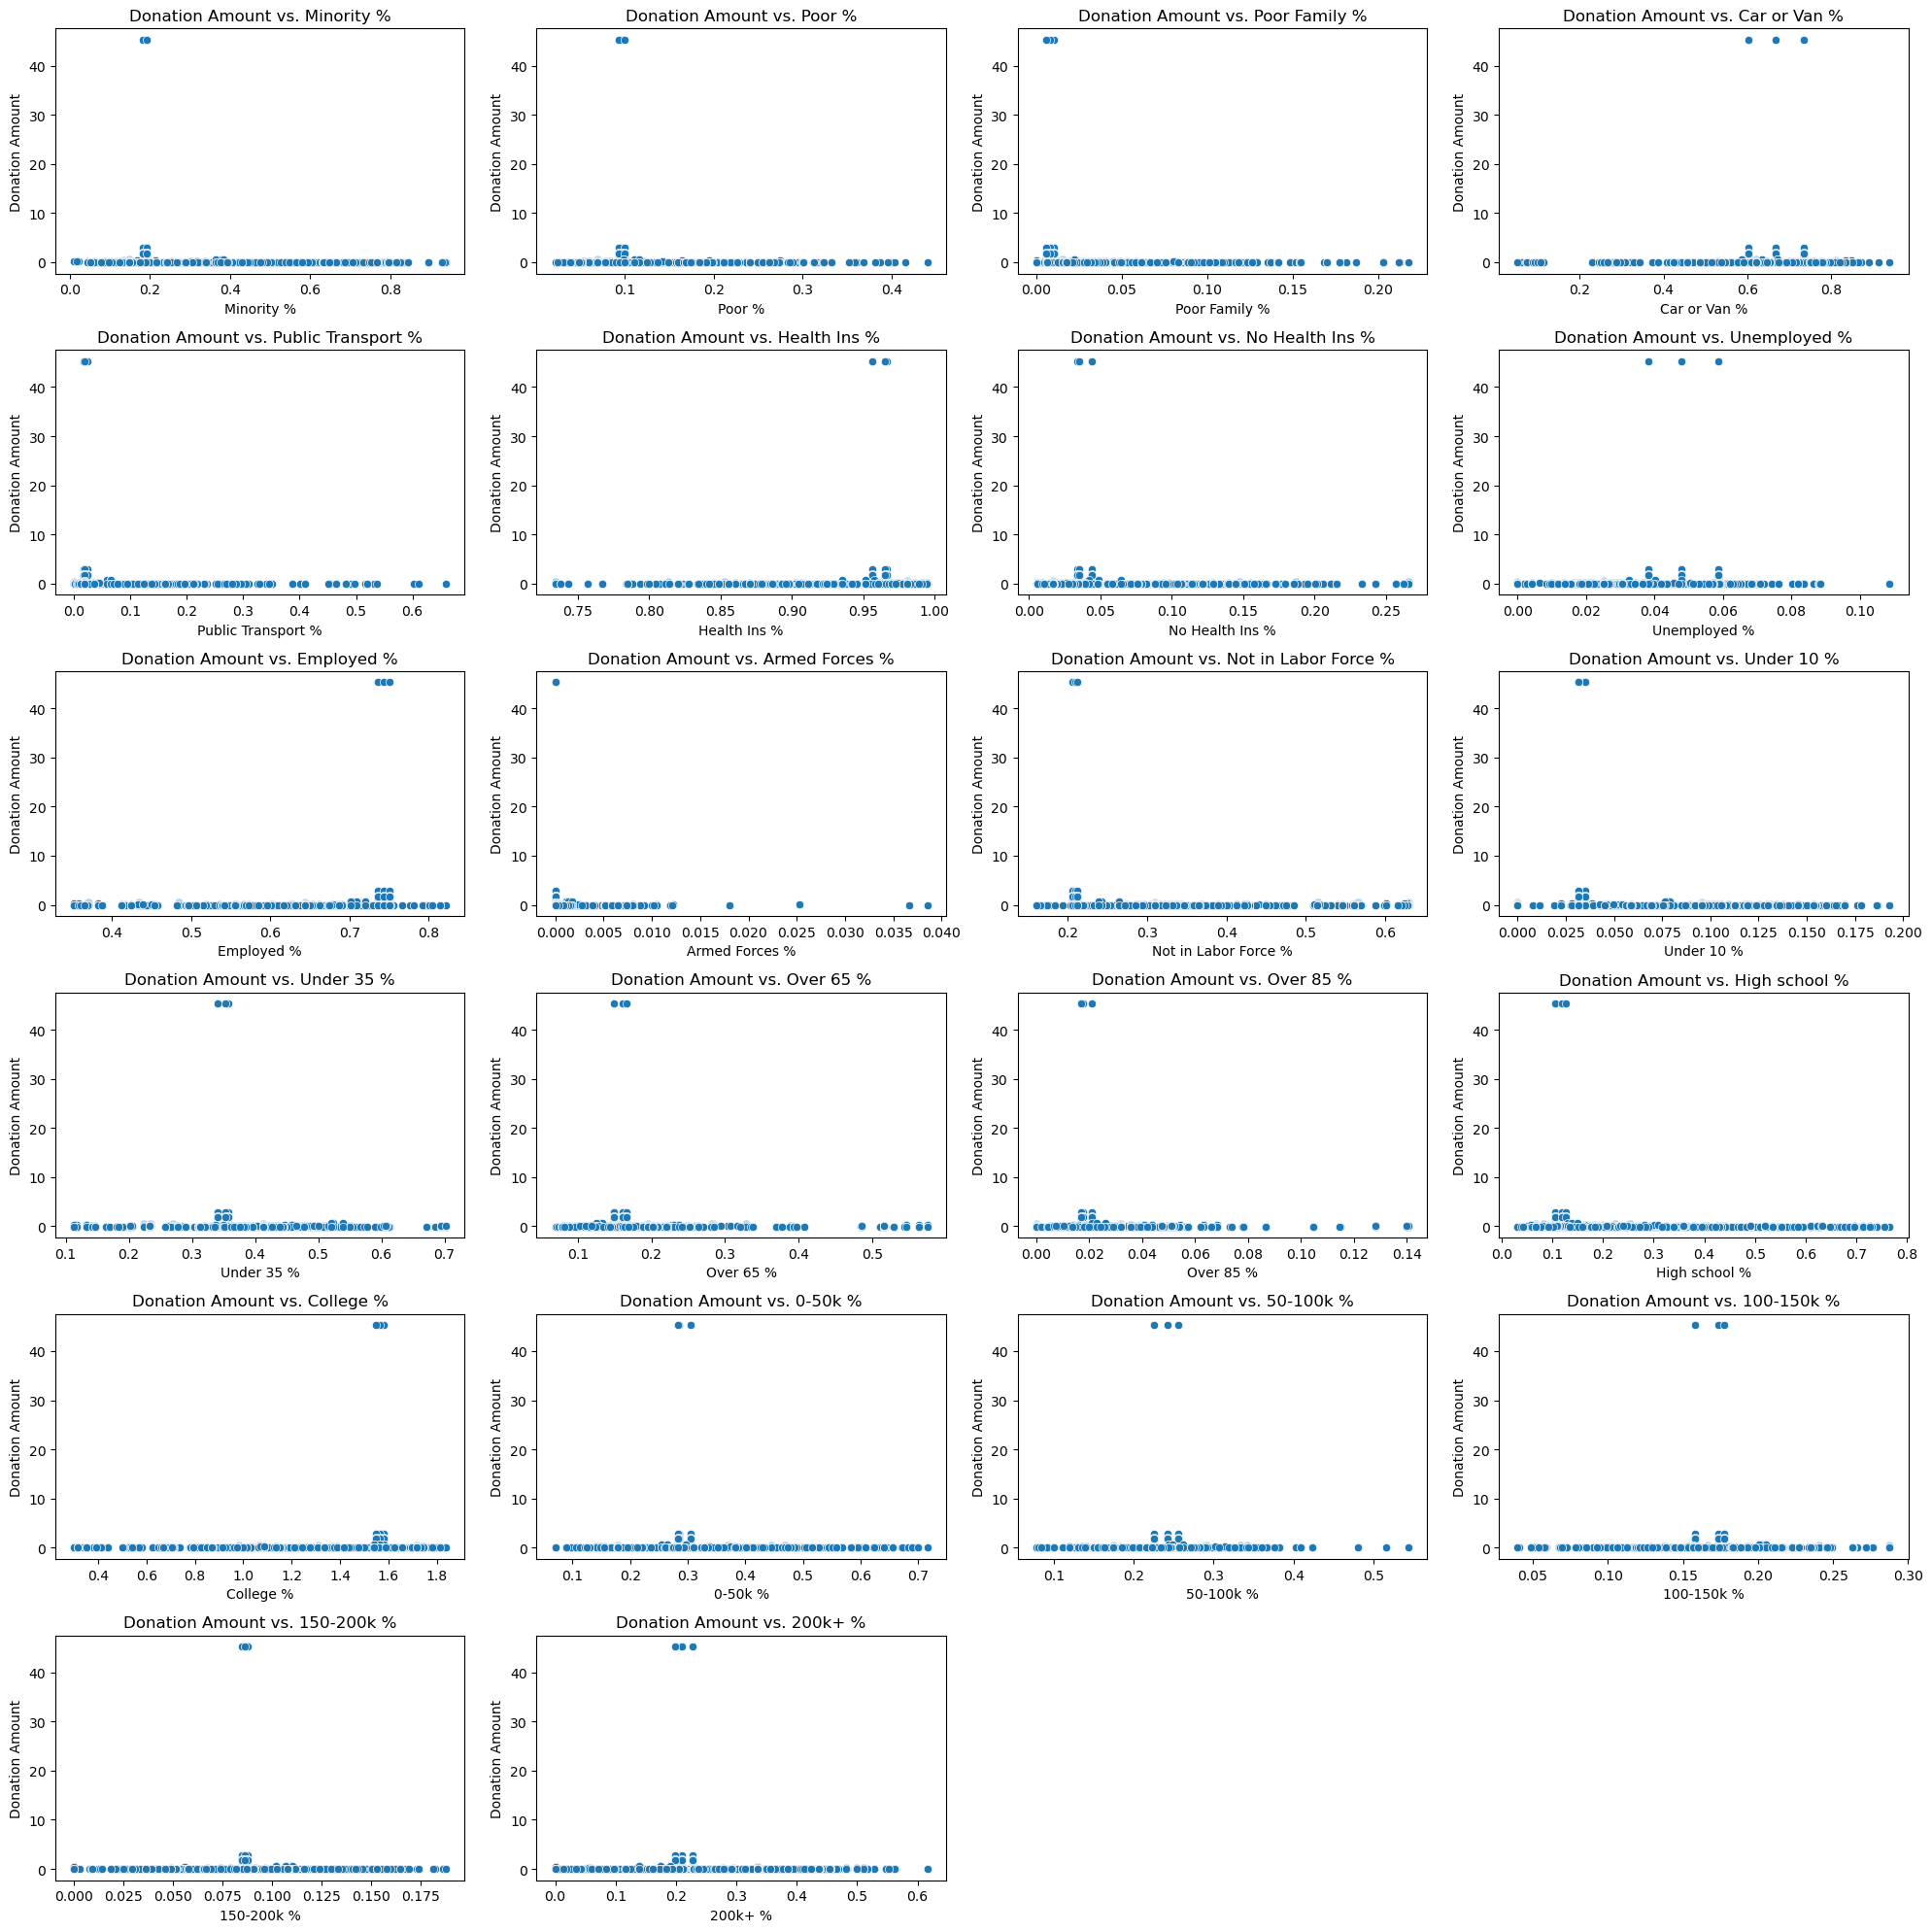

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of demographic percentage columns
percentage_columns = [
    'Minority %', 'Poor %', 'Poor Family %', 'Car or Van %', 
    'Public Transport %', 'Health Ins %', 'No Health Ins %', 
    'Unemployed %', 'Employed %', 'Armed Forces %', 'Not in Labor Force %', 
    'Under 10 %', 'Under 35 %', 'Over 65 %', 'Over 85 %', 
    'High school %', 'College %', '0-50k %', '50-100k %', 
    '100-150k %', '150-200k %', '200k+ %'
]

plt.figure(figsize=(20, 20)) 

# Plot scatter plots for each percentage feature vs. donation amount
for i, col in enumerate(percentage_columns, 1):
    plt.subplot(6, 4, i)
    sns.scatterplot(data=df_copy, x=col, y='Amount')
    plt.title(f'Donation Amount vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Donation Amount')

plt.tight_layout()
plt.show()

In [196]:
df_copy = pd.get_dummies(df_copy, columns=['Account Type', 'Stage', 'Maked Primary Campaign'], drop_first=True)

In [197]:
%pip install category_encoders
import category_encoders as ce

# Initialize target encoder for high-cardinality columns
target_encoder = ce.TargetEncoder(cols=['Billing Zip/Postal Code', 'Masked Account ID'])
df_copy[['Billing Zip/Postal Code', 'Masked Account ID']] = target_encoder.fit_transform(df_copy[['Billing Zip/Postal Code', 'Masked Account ID']], df_copy['Amount'])

Note: you may need to restart the kernel to use updated packages.


In [198]:
df_copy

,Masked Account ID,Billing Zip/Postal Code,Fiscal Period,Close Date,Amount,ZCTA,Year,Pop,Households,HH Income,...,Stage_In-Kind Received,Maked Primary Campaign_Campaign One 2015,Maked Primary Campaign_Campaign One 2016,Maked Primary Campaign_Campaign Two 2017,Maked Primary Campaign_Campaign Two 2018,Maked Primary Campaign_Campaign Two 2019,Maked Primary Campaign_Campaign Two 2020,Maked Primary Campaign_Campaign Two 2021,Maked Primary Campaign_Campaign Two 2022,Maked Primary Campaign_Campaign Two 2023
0,3.713661,2.337194,Q3-2022,7/5/2022,1.769909,90069.0,2021.000000,-0.588987,0.130678,-2.015035e-01,...,0,1,0,0,0,0,0,0,0,0
1,3.713661,2.337194,Q3-2022,7/5/2022,1.769909,90069.0,2020.000000,-0.599146,0.085753,-3.631678e-01,...,0,1,0,0,0,0,0,0,0,0
2,3.713661,2.337194,Q3-2022,7/5/2022,1.769909,90069.0,2019.000000,-0.585939,0.072308,-3.450642e-01,...,0,1,0,0,0,0,0,0,0,0
3,3.713661,2.337194,Q3-2023,7/14/2023,1.769909,90069.0,2021.000000,-0.588987,0.130678,-2.015035e-01,...,0,1,0,0,0,0,0,0,0,0
4,3.713661,2.337194,Q3-2023,7/14/2023,1.769909,90069.0,2020.000000,-0.599146,0.085753,-3.631678e-01,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6285,-0.004275,-0.008042,Q3-2023,7/25/2023,-0.032859,91189.0,2020.005858,0.000000,0.000000,6.659371e-16,...,0,0,0,0,0,0,0,0,0,1
6286,-0.004275,-0.004275,Q3-2023,7/29/2023,-0.032859,90721.0,2020.005858,0.000000,0.000000,6.659371e-16,...,0,0,0,0,0,0,0,0,0,1
6287,-0.006126,-0.006126,Q3-2023,8/7/2023,-0.039662,60068.0,2021.000000,0.721287,0.513530,6.194018e-01,...,0,0,0,0,0,0,0,0,0,1
6288,-0.006126,-0.006126,Q3-2023,8/7/2023,-0.039662,60068.0,2020.000000,0.577432,0.381213,3.807789e-01,...,0,0,0,0,0,0,0,0,0,1


In [199]:
df_copy['Close Date'] = pd.to_datetime(df_copy['Close Date'])
df_copy['Close Year'] = df_copy['Close Date'].dt.year
df_copy['Close Month'] = df_copy['Close Date'].dt.month
df_copy['Close DayOfWeek'] = df_copy['Close Date'].dt.dayofweek

In [200]:
df_copy

,Masked Account ID,Billing Zip/Postal Code,Fiscal Period,Close Date,Amount,ZCTA,Year,Pop,Households,HH Income,...,Maked Primary Campaign_Campaign Two 2017,Maked Primary Campaign_Campaign Two 2018,Maked Primary Campaign_Campaign Two 2019,Maked Primary Campaign_Campaign Two 2020,Maked Primary Campaign_Campaign Two 2021,Maked Primary Campaign_Campaign Two 2022,Maked Primary Campaign_Campaign Two 2023,Close Year,Close Month,Close DayOfWeek
0,3.713661,2.337194,Q3-2022,2022-07-05,1.769909,90069.0,2021.000000,-0.588987,0.130678,-2.015035e-01,...,0,0,0,0,0,0,0,2022,7,1
1,3.713661,2.337194,Q3-2022,2022-07-05,1.769909,90069.0,2020.000000,-0.599146,0.085753,-3.631678e-01,...,0,0,0,0,0,0,0,2022,7,1
2,3.713661,2.337194,Q3-2022,2022-07-05,1.769909,90069.0,2019.000000,-0.585939,0.072308,-3.450642e-01,...,0,0,0,0,0,0,0,2022,7,1
3,3.713661,2.337194,Q3-2023,2023-07-14,1.769909,90069.0,2021.000000,-0.588987,0.130678,-2.015035e-01,...,0,0,0,0,0,0,0,2023,7,4
4,3.713661,2.337194,Q3-2023,2023-07-14,1.769909,90069.0,2020.000000,-0.599146,0.085753,-3.631678e-01,...,0,0,0,0,0,0,0,2023,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6285,-0.004275,-0.008042,Q3-2023,2023-07-25,-0.032859,91189.0,2020.005858,0.000000,0.000000,6.659371e-16,...,0,0,0,0,0,0,1,2023,7,1
6286,-0.004275,-0.004275,Q3-2023,2023-07-29,-0.032859,90721.0,2020.005858,0.000000,0.000000,6.659371e-16,...,0,0,0,0,0,0,1,2023,7,5
6287,-0.006126,-0.006126,Q3-2023,2023-08-07,-0.039662,60068.0,2021.000000,0.721287,0.513530,6.194018e-01,...,0,0,0,0,0,0,1,2023,8,0
6288,-0.006126,-0.006126,Q3-2023,2023-08-07,-0.039662,60068.0,2020.000000,0.577432,0.381213,3.807789e-01,...,0,0,0,0,0,0,1,2023,8,0


In [201]:
df_copy = df_copy[df_copy['Amount'] >= 0]


In [202]:
for col, dtype in df_copy.dtypes.items():
    if dtype == 'object':
        print(f"Column: {col}, Data Type: {dtype}")


Column: Fiscal Period, Data Type: object


In [203]:
df['Fiscal Period'].head()

0    Q3-2022
1    Q3-2022
2    Q3-2022
3    Q3-2023
4    Q3-2023
Name: Fiscal Period, dtype: object

In [204]:
# If Masked Account ID appears more than once, label as 1 (repeat donor), else 0

# Create a new column 'repeat_donor' with the binary label
df_copy['repeat_donor'] = df_copy.groupby('Masked Account ID')['Masked Account ID'].transform('count') > 1
df_copy['repeat_donor'] = df_copy['repeat_donor'].astype(int)  # Convert boolean to integer (1 for repeat, 0 for single-time)

# Verify labels
print(df_copy[['Masked Account ID', 'repeat_donor']].drop_duplicates().sort_values(by='Masked Account ID'))

      Masked Account ID  repeat_donor
1852          -0.027674             1
1824          -0.026839             1
63            -0.024500             1
4199          -0.021114             1
202           -0.020670             1
...                 ...           ...
1829           0.042625             1
45             0.080418             1
535            0.114618             1
1661           0.219624             1
0              3.713661             1

[66 rows x 2 columns]


/var/folders/jg/d1ymlz6d62n73b25blc9p3h00000gn/T/ipykernel_23266/1217284805.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['repeat_donor'] = df_copy.groupby('Masked Account ID')['Masked Account ID'].transform('count') > 1
/var/folders/jg/d1ymlz6d62n73b25blc9p3h00000gn/T/ipykernel_23266/1217284805.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['repeat_donor'] = df_copy['repeat_donor'].astype(int)  # Convert boolean to integer (1 for repeat, 0 for single-time)


In [205]:
from sklearn.ensemble import RandomForestClassifier  # Use Classifier instead of Regressor for binary target
from sklearn.feature_selection import RFE
import pandas as pd

# Define model as RandomForestClassifier for binary target
estimator = RandomForestClassifier(random_state=42)

# Initialize RFE with the estimator
rfe = RFE(estimator=estimator, n_features_to_select=6)  # Select top 10 features, adjust as needed - This version changes it to 6

# Prepare X by dropping target and irrelevant columns
# Drop Masked Account ID and other irrelevant columns for modeling
X = df_copy.drop(columns=['Amount', 'Masked Account ID', 'repeat_donor', 'Close Date', 'Fiscal Period'])

# Convert datetime columns to useful numeric features
if 'Close Date' in X.columns:
    X['Close Year'] = pd.to_datetime(X['Close Date']).dt.year
    X['Close Month'] = pd.to_datetime(X['Close Date']).dt.month
    X['Close DayOfWeek'] = pd.to_datetime(X['Close Date']).dt.dayofweek
    
    # Drop the original datetime column
    X = X.drop(columns=['Close Date'])

# Define the target variable
y = df_copy['repeat_donor']

# Fit RFE
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Billing Zip/Postal Code', 'ZCTA', 'Less than High School',
       'Close Year', 'Close Month', 'Close DayOfWeek'],
      dtype='object')


In [206]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

In [207]:
# Define X and y based on your selected features
X = df_copy[['Billing Zip/Postal Code', 'ZCTA', 'Education Years', 'High school %',
             'large_donation_flag', 'Account Type_Household', 
             'Maked Primary Campaign_Campaign One 2015', 
             'Close Year', 'Close Month', 'Close DayOfWeek']]
y = df_copy['repeat_donor']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [208]:
# Check the distribution of classes in the training set
print(y_train.value_counts())

# For a more readable output with percentages
print(y_train.value_counts(normalize=True) * 100)

1    425
0      6
Name: repeat_donor, dtype: int64
1    98.607889
0     1.392111
Name: repeat_donor, dtype: float64


In [209]:
# Parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest with RandomizedSearchCV
rf_model = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf,
                               n_iter=20, cv=5, scoring='f1', random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
rf_search.fit(X_train, y_train)

# Get best model from RandomizedSearchCV
best_rf_model = rf_search.best_estimator_
print("Best Random Forest Parameters:", rf_search.best_params_)

Best Random Forest Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': True}


In [210]:
# Predictions and probabilities
y_pred = best_rf_model.predict(X_test)
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]

In [211]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Precision: 0.9783783783783784
Recall: 1.0
F1-Score: 0.9890710382513661
AUC-ROC: 0.8812154696132597

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.98      1.00      0.99       181

    accuracy                           0.98       185
   macro avg       0.49      0.50      0.49       185
weighted avg       0.96      0.98      0.97       185



/Users/imani/anaconda3/envs/UW/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/imani/anaconda3/envs/UW/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/imani/anaconda3/envs/UW/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


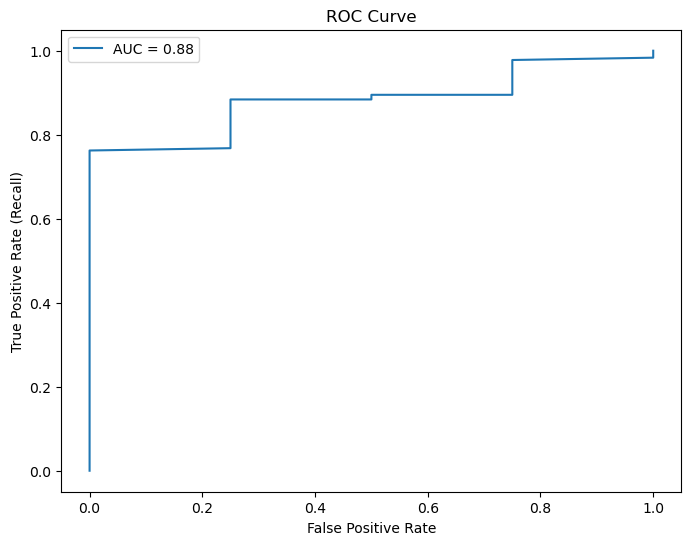

In [212]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

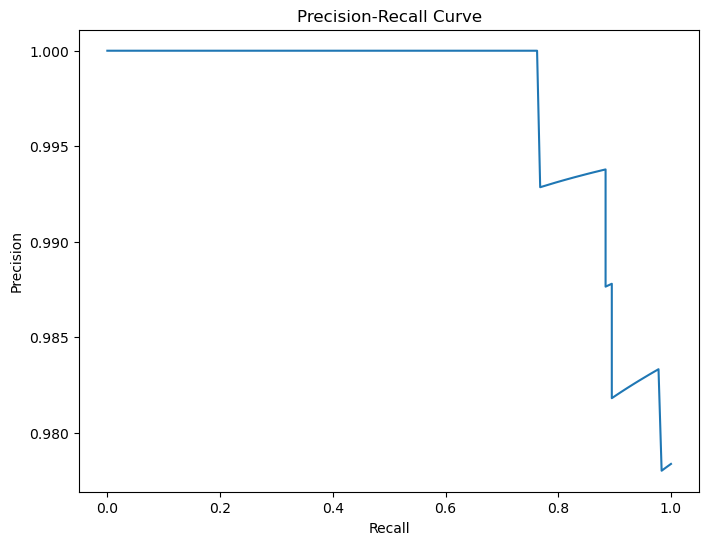

In [213]:
# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [214]:
!pip install imbalanced-learn

In [215]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# check new distribution of the training labels after SMOTE
print("Training label distribution after SMOTE:")
print(y_train_resampled.value_counts())

# initialize and train the model with class weighting
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# evaluate the model!
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

Training label distribution after SMOTE:
1    425
0    425
Name: repeat_donor, dtype: int64

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.98      0.98      0.98       181

    accuracy                           0.97       185
   macro avg       0.62      0.62      0.62       185
weighted avg       0.97      0.97      0.97       185

AUC-ROC: 0.9316298342541436
